# 데이터 불러들이기

In [2]:
import pandas as pd

In [4]:
file_path = "./data/01_회귀_주택가격예측_데이터셋_Row_1000.csv"
df_org = pd.read_csv(file_path)

In [7]:
df_org.info()
df_org.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


# 데이터 전처리(결측, 중복, 이상치 확인)

In [8]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [11]:
df_org.describe()

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


In [13]:
df_org.duplicated().value_counts()

False    1000
Name: count, dtype: int64

# 기초통계에서 이상유무 확인 후
- 다시한번 시각화하여 확인
- 박스플롯으로 확인

In [31]:
### 시각화를 위한 라이브러리
# - 파이썬 시각화에서 가장 기본적인 시각화 라이브러리
import matplotlib.pyplot as plt

import seaborn as sns

### 한글처리
from matplotlib import font_manager, rc

### 운영체제 확인 라이브러리
import platform

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

### OS별 한글처리
# - 윈도우 운영체게
if platform.system() == "Windows" :
    # path = "c:/Windows/Fonts/malgun.ttf"
    # font_name = font_manager.FontProperties(fname=path).get_name()
    # rc("font", family = font_name)
    
    ### 또는 아래처럼 한줄로도 가능 (아래 한글처리를 주로 사용합니다.)
    plt.rc("font", family = "Malgun Gothic")

# - Mac 운영체제
elif platform.system() == "Darwin" :
    rc("font", family = "AppleGothic")
    
else :
    print("넌 누구?")

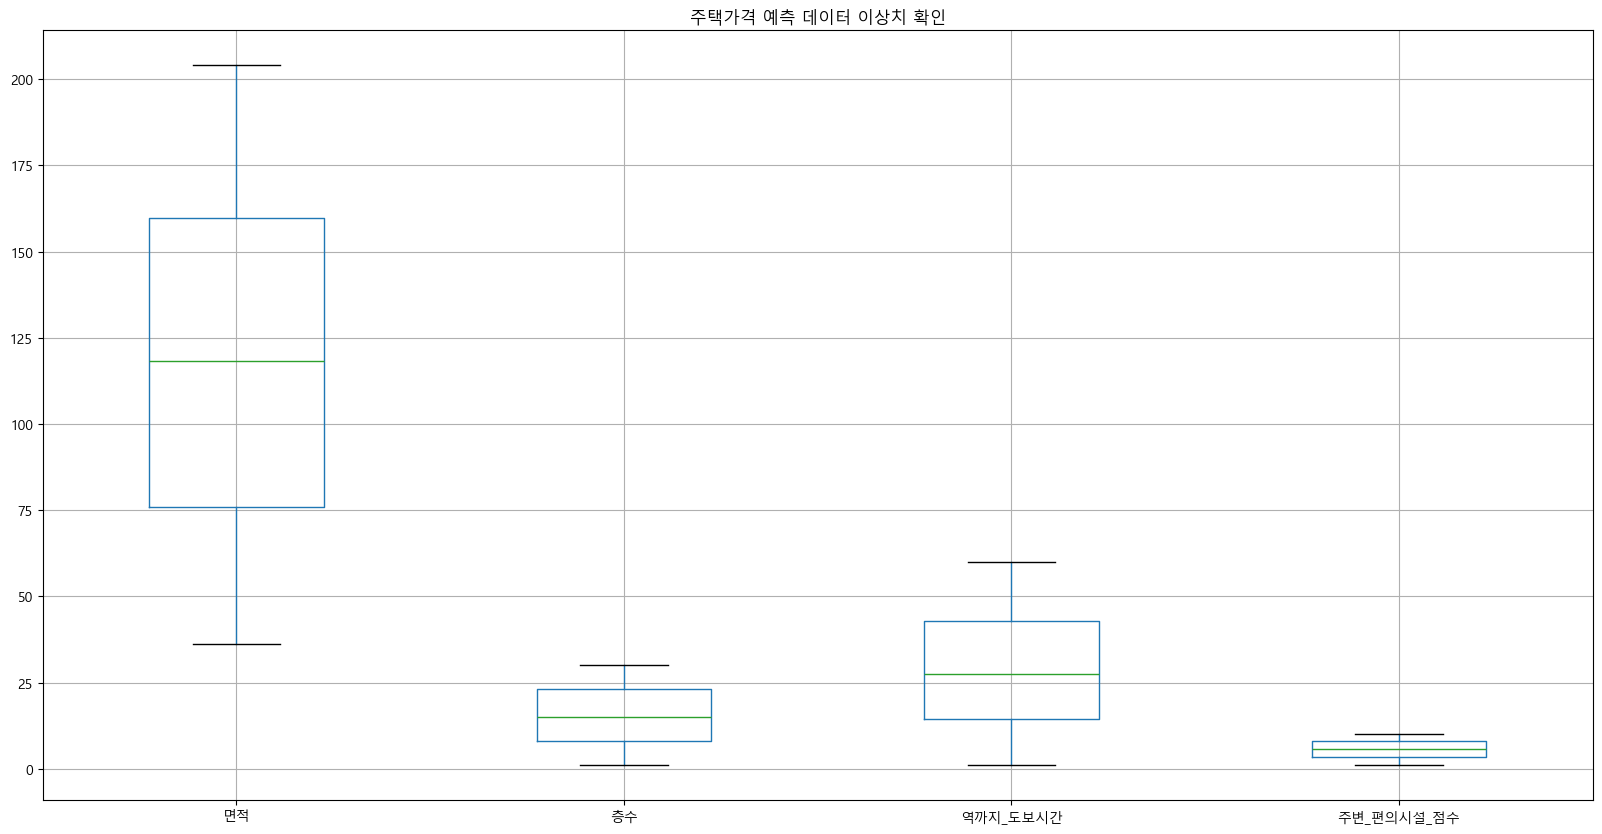

In [24]:
plt.figure(figsize=(20,10))
plt.title("주택가격 예측 데이터 이상치 확인")
df_tmp = pd.DataFrame()
df_tmp["면적"] = df_org["면적"]
df_tmp["층수"] = df_org["층수"]
df_tmp["역까지_도보시간"] = df_org["역까지_도보시간"]
df_tmp["주변_편의시설_점수"] = df_org["주변_편의시설_점수"]
df_tmp.boxplot()  # 박스플롯 그리기 : 데이터프레임에서 제공하는 시각화 함수 사용
plt.show()

# 특성들 간의 관계 확인
 <특성들 간의 관계 확인>
  - 상관관계 분석 : 선형성 또는 비선형성 확인
  - 상관관계는 표 또는 시각화로 확인 가능
  - 시각화의 경우 산점행렬도(산점도 그래프)를 사용
  - 산점행렬도 그래프 -> 종속변수를 기준으로 독립변수들 간의 형태를 확인
  - 선형형태(회귀분석 진행), 비선형형태(분류분석 진행)
  - 상관관계는 값으로 확인 가능 <br>
    -> 이 값을 상관관계 계수라고 칭함<br>
    -> 상관관계 계수는 절대값으로 확인 (0 ~ 1사이의 값으로 나타냄)<br>
    -> 1에 가까울수록 상관관계 높음<br>
    -> 0에 가까울수록 상관관계 낮음<br>
    -> 음수(-)인 값의 경우 반비례 형태의 산점도 분포를 보임
    -> 양수(+)인 값의 경우 반비례 형태의 산점도 분포를 보임

In [27]:
# 상관관계 표 나타내기
# 확인 방법 : 왼쪽 상단에서 오른쪽 하단으로 대각선의 값들은 모두 1
#          : 대각선 값들의 왼쪽편 또는 오른쪽편 한쪽만 보면 됨 

corr_matrix = df_org.corr()
corr_matrix 

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
면적,1.000000,0.058629,-0.025361,0.050418,0.963063
층수,0.058629,1.000000,-0.029001,-0.013287,0.229850
역까지_도보시간,-0.025361,-0.029001,1.000000,-0.003508,-0.117005
주변_편의시설_점수,0.050418,-0.013287,-0.003508,1.000000,0.091508
주택_가격,0.963063,0.229850,-0.117005,0.091508,1.000000


# 상관관계 히트맵 그리기

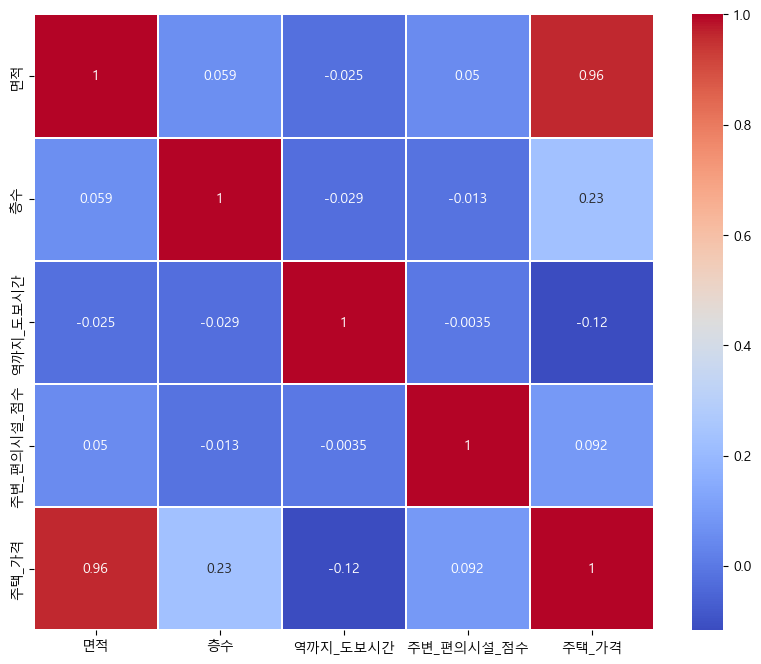

In [35]:

plt.figure(figsize=(10, 8))
plt.title = "상관관계 메트릭스 시각화"
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# 산점행렬도 그리기

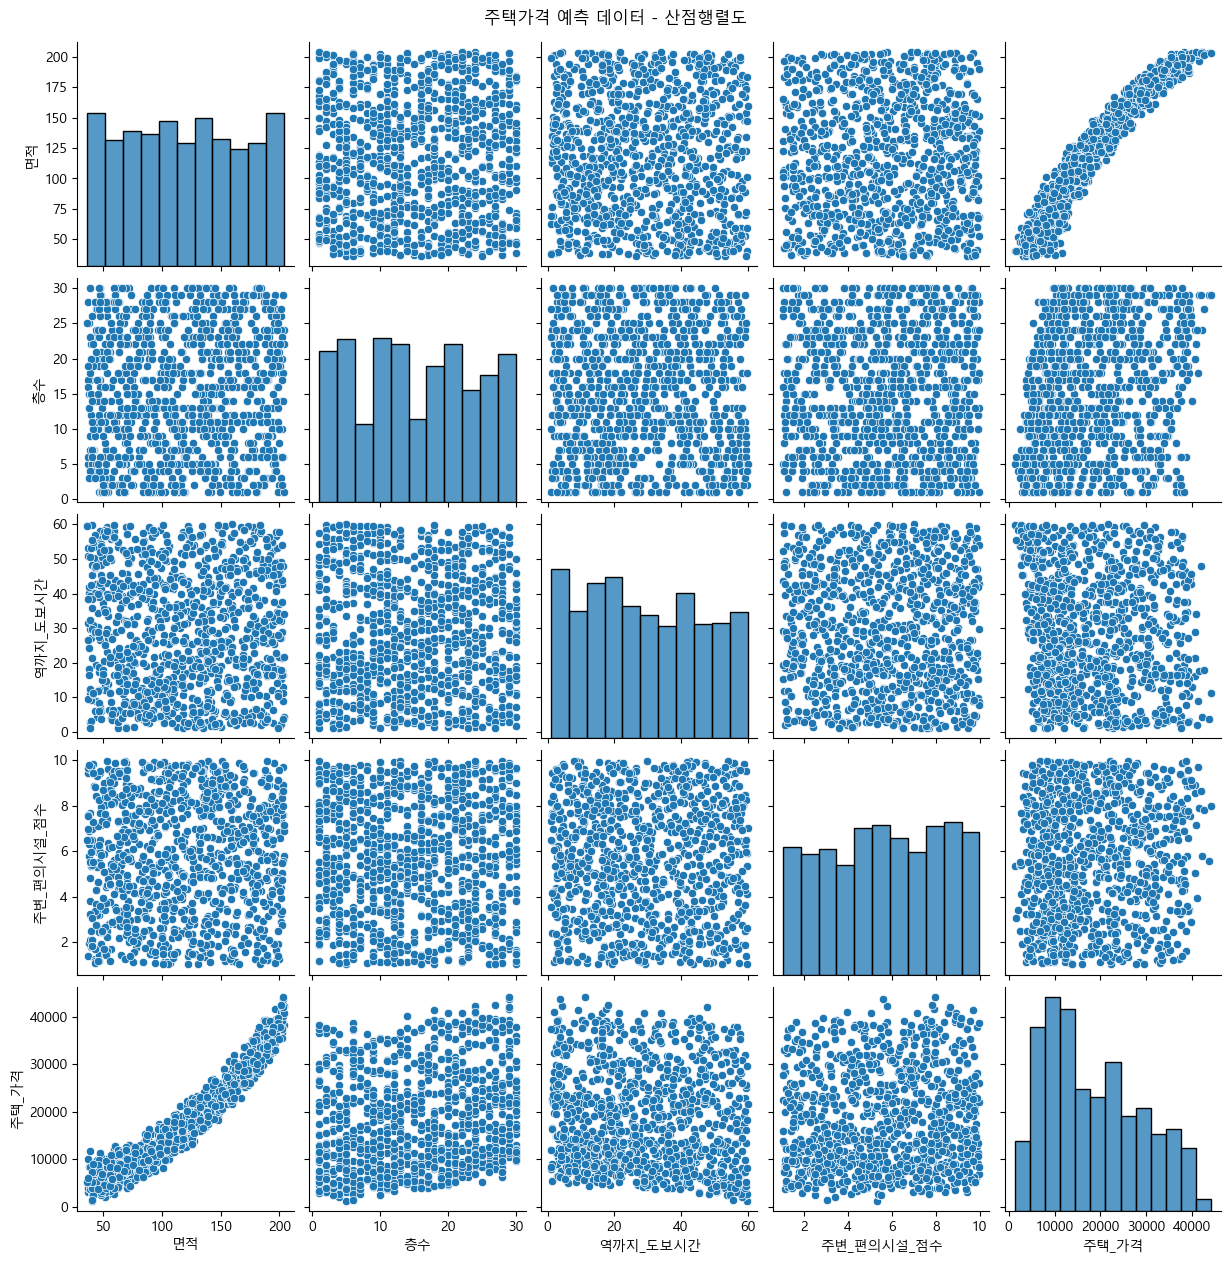

In [39]:
sns.pairplot(df_org)
plt.suptitle("주택가격 예측 데이터 - 산점행렬도", y=1.01)
plt.show()

### 상관관계 검증을 위해 독립변수(x)와 종속변수(y)로 데이터 분리

In [75]:
# 원본 데이터에서 독립변수로 사용할 특성 추출하기
X = df_org.iloc[:, :4]
y = df_org["주택_가격"]  # 종속변수는 1차원 형태를 사용

### 스피어만 상관관계 검정
- 사용 패키지 : scipy.stats
- 사용 라이브러리 : spearmanr(끝에 r을 붙임)

In [69]:
from scipy.stats import spearmanr

In [50]:
# 각 독립변수별로 종속변수와 비교
# - 독립변수 4개  반속해서 처리
for el in X.columns:
    print(el)

면적
층수
역까지_도보시간
주변_편의시설_점수


In [53]:
spearmanr(X['면적'], Y)

# 결과값 해석
# - statistic : 상관계수 계수값
# - pvalue : 유의미 계수(p-value 값)

# 해석
# - 상관관계계수의 값 0.97로 독립변수는 종속변수와 관계성이 매우 높음
# - p-value < 0.05 이므로 유의미함
#   (이렇게 해석을 하시면 안됩니다.)
#       -> p-value의 유의미 계수값이 0.0.으로 0.05보다 작으므로 유의미함

SignificanceResult(statistic=np.float64(0.9704259944259946), pvalue=np.float64(0.0))

In [68]:
for col_name in X.columns:
    tmp = spearmanr(X[col_name], Y)
    print(col_name)
    print(f"상관계수 계수값 : {tmp[0]:.3f}")
    print(f"      p-value : {tmp[1]:.3f}")
    print("-------------------------")

면적
상관계수 계수값 : 0.970
      p-value : 0.000
-------------------------
층수
상관계수 계수값 : 0.238
      p-value : 0.000
-------------------------
역까지_도보시간
상관계수 계수값 : -0.131
      p-value : 0.000
-------------------------
주변_편의시설_점수
상관계수 계수값 : 0.091
      p-value : 0.004
-------------------------


### 피어슨 상관관계 검정
- 사용 패키지 : scipy.stats
- 사용 라이브러리 : pearsonr(끝에 r을 붙임)

In [ ]:
from scipy.stats import pearsonr

In [71]:
for col_name in X.columns:
    tmp = pearsonr(X[col_name], Y)
    print(col_name)
    print(f"상관계수 계수값 : {tmp[0]:.3f}")
    print(f"      p-value : {tmp[1]:.3f}")
    print("-------------------------")

면적
상관계수 계수값 : 0.963
      p-value : 0.000
-------------------------
층수
상관계수 계수값 : 0.230
      p-value : 0.000
-------------------------
역까지_도보시간
상관계수 계수값 : -0.117
      p-value : 0.000
-------------------------
주변_편의시설_점수
상관계수 계수값 : 0.092
      p-value : 0.004
-------------------------


### 해석
- 주택가격 예측을 위해 사용하고자하는 모든 독립변수들과 종속변수와의 유의미성을 확인한 결과
- 모든 독립변스와 종속변수 간에서 p-value < 0.05 로 유의미함을 나타내고 있음
- 따라서, 주택가격 예측에 모든 독립변수를 사용하여 분석을 진핼할 수 있음

# 모델 훈련하기

### 모델훈련은 위해 독힙변수와 종속변수를 전처리
- 훈련, 검증, 테스트 데이터로 분리

In [ ]:
"""
 <변수 정의>
 - 훈련데이터에 대한 독립 및 종속변수 : X_train / y_train
 - 검증데이터에 대한 독립 및 종속변수 : X_val / y, y_val
 - 테스트데이터에 대한 독립 및 종속변수 : X_test / y, y_test

 <데이터 분리 기중>
 - 정의된 기준은 없음, 일반적으로 사용되는 비율을 사용
 - 훈련 : 검증 : 테스트 = 6 : 2 : 2 or 8 : 1 : 1
 - 훈련 : 테스트 = 7 : 3 or 8 : 2 or 7.5 : 2.5
"""

###  훈련 : 검증 : 테스트 = 6 : 2 : 2 로 데이터 분리

In [ ]:
"""
<데이터 분리를 위한 라이브러리>
- 사용할 패키지 : sklearn.model_selection
- 사용할 라이브러리 : train_test_split
"""

In [74]:
from sklearn.model_selection import train_test_split

In [82]:
# 2개씩만 분리 가능
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [83]:
# shape : 차원을 확인할 때 사용
# 독립변수는 2차원, 종속변수는 1차원을 사용 (규칙임)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 4) (400, 4) (600,) (400,)


In [84]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [86]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


### 스케일링 작업하기
- 스케일링 : 정규화

In [ ]:
"""
<스케일링=정규화 라이브러리>
- 사용할 패키지 : sklearn.preprocessing
- 사용할 라이브러리 : StandardScaler
- 중요 : 스케일링은 독립변수에만 수행 (종속변수 X)
"""

In [88]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
# 변환 패턴을 스스로 찾게 함
# 이떄 사용하는 독립변수는 훈련데이터만 
scaler.fit(X_train)


StandardScaler()

In [103]:
# 독립변수들(훈련, 검증, 테스트) 변환시키기  (**훈련에 fit한 스케일러 그대로 사용)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [105]:
print(X_train_scaled.shape, y_train.shape)
print(X_val_scaled.shape, y_val.shape)
print(X_test_scaled.shape, y_test.shape)

(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


In [ ]:
"""
<모델 훈련에 사용하는 데이터>
 - 훈련데이터로 훈련(학습) 시킵니다.
 - 훈련이 완료된 후 검증 데이터를 이용해서 훈현을 잘 했는지 확인합니다.
 - 확인 방법 ㅣ 과적합(과대/과소 적합) 여부 확인합니다.
 - 과적합 판단 : 훈련 정확도가 검증 정확도보다 낮으면 ==> 과소적합 이라고 판단합니다. (훈련을 못한 것)
 - 훈련 : 검증 : 테스트의 정확도 비교 ==> 훈련 > 검증 > 테스트 형태가 가장 이상적임
                                   ==> 훈련 > 검증 < 테스트 인 경우도 있음
"""

In [ ]:
"""
<사용하는 모델>
 - 주택가격은 숫자의 연속된 종속변수값을 사용하기에 회귀모델을 사용합니다.
  1. LinearRegression(선형회귀모델)
  2. Ridgge(릿지 모델)
  3. Lasso(라쏘 모델)
  4. RandomforestRegressor(랜덤포래스트 모델, RF 모델)
  5. GradientBoostingRegressor(그레디언트 부스팅 모델, GB 모델)
  6. HistGradientBoostingRegressor(히스트 그레디언트 부스팅 모델, HGB 모델)
  7. xgboost(엑스지부스트 모델, 보통 XGB 모델이라고 칭함)
  
<성능 차이>
 - 가장 낮은 성능 : 1
 - 중간 성능 : 2, 3
 - 높은 성능 : 4, 5
 - 매우 높은 성능 : 6

 ** 다만 데이터의 특성에 따라서 성능의 차이는 다를 수 있음
"""

In [ ]:
from sklearn.reg

In [108]:
tmp = [0, 0, 0, 0]
for index in range(4):
    for i in range(3):
        tmp[index] = i
        print(tmp)

[0, 0, 0, 0]
[1, 0, 0, 0]
[2, 0, 0, 0]
[2, 0, 0, 0]
[2, 1, 0, 0]
[2, 2, 0, 0]
[2, 2, 0, 0]
[2, 2, 1, 0]
[2, 2, 2, 0]
[2, 2, 2, 0]
[2, 2, 2, 1]
[2, 2, 2, 2]
